In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

# **Original Dataset**


In [3]:
# pip install opendatasets

In [4]:
# import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler# sklearn.preprocessing.RobustScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [5]:
def counts(column_name):
  a = df_original[column_name].value_counts()
  return a

In [6]:
# od.download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [7]:
df_original = pd.read_csv("adult.csv")

In [8]:
df_original.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
print(df_original.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


In [10]:
target = df_original[df_original.columns[-1]]
target_binary = pd.get_dummies(target,drop_first=True,)   # class >50k is 1 and other is 0

In [11]:
df_original.describe()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-los     32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:>

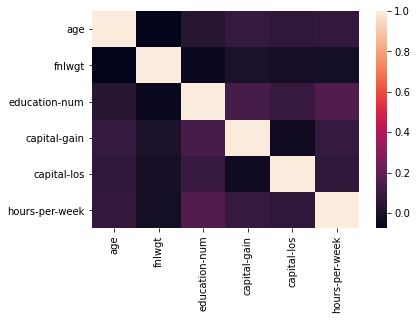

In [13]:
sns.heatmap(df_original.corr())

In [14]:
print('Income Less than 50k' , str((target_binary.value_counts()[0]/len(target_binary))*100))
print('Income More than 50k' , str((target_binary.value_counts()[1]/len(target_binary))*100))

Income Less than 50k 75.91904425539757
Income More than 50k 24.080955744602438


In [15]:
print(len(df_original))

32561


# EDA

In [16]:
eda = df_original.copy()
eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
eda.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

### Checking distribution of columns -[ 'age , 'fnlwgt' , 'capital-gain' , 'capital-los' ]

<AxesSubplot:xlabel='capital-los', ylabel='Count'>

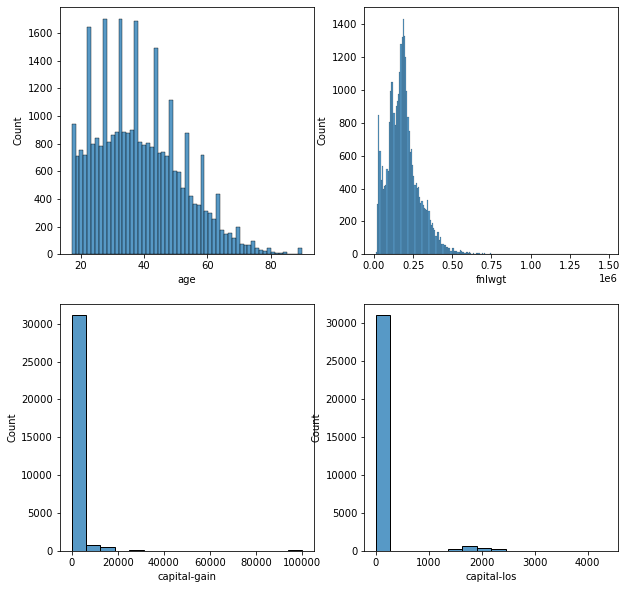

In [18]:
eda.columns
fig,ax = plt.subplots(2,2,figsize=(10,10))
# eda['age', 'fnlwgt', 'capital-gain', 'capital-los'].boxplot()
sns.histplot(eda['age'],ax = ax[0,0])
sns.histplot(eda['fnlwgt'],ax = ax[0,1])
sns.histplot(eda['capital-gain'],ax = ax[1,0])
sns.histplot(eda['capital-los'],ax = ax[1,1])


In [19]:
eda.drop(['capital-gain','capital-los'], axis=1,inplace = True)
eda.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### Replacing missing values of 'workclass' with mode

In [20]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  Income          32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [21]:
# def replace_nan_with_mode(column_names,df):
#     for column_name in df.columns:
#         mode_value = df[column_name].mode()[0]
#         df[column_name] = df[column_name].replace("?", mode_value)
#     return

# li = ["occupation"]
# replace_nan_with_mode(li,df_original)
counts('occupation')

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

# Binning the categories

## Education

In [22]:
li1 = ["Doctorate","Prof-school"]
li2 = ['11th','10th',"9th","12th"]
li3 = ["5th-6th","7th-8th"]
li4 = ["1st-4th","Preschool"]
li5 = ['HS-grad','Some-college','Bachelors']
li6 = ['Assoc-voc','Assoc-acdm']
eda['education'] = eda['education'].replace(li1, "PHD lvl")
eda['education'] = eda['education'].replace(li2, "High school")
eda['education'] = eda['education'].replace(li3, "Junior school")
eda['education'] = eda['education'].replace(li4, "Pre school")
eda['education'] = eda['education'].replace(li5, "Grad")
eda['education'] = eda['education'].replace(li6, "Assoc")
eda.education.value_counts()

Grad             23147
High school       3055
Assoc             2449
Masters           1723
PHD lvl            989
Junior school      979
Pre school         219
Name: education, dtype: int64

## Marital Status

In [23]:
li = ["Never-married"]
li2 = ["Separated","Married-spouse-absent","Married-civ-spouse",'Married-AF-spouse']
eda['marital-status'] = eda['marital-status'].replace(li2, "Married")
eda['marital-status'].value_counts()

Married          16442
Never-married    10683
Divorced          4443
Widowed            993
Name: marital-status, dtype: int64

## Native Country

In [24]:
eda[['native-country']]=eda[['native-country']]=='United-States'
eda['native-country'].value_counts()

True     29170
False     3391
Name: native-country, dtype: int64

In [25]:
eda['native-country'] = eda['native-country'].replace([True,False],['US','Non-US'])
eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,State-gov,77516,Grad,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,US,<=50K
1,50,Self-emp-not-inc,83311,Grad,13,Married,Exec-managerial,Husband,White,Male,13,US,<=50K
2,38,Private,215646,Grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,US,<=50K
3,53,Private,234721,High school,7,Married,Handlers-cleaners,Husband,Black,Male,40,US,<=50K
4,28,Private,338409,Grad,13,Married,Prof-specialty,Wife,Black,Female,40,Non-US,<=50K


## Education Num

<AxesSubplot:ylabel='education-num'>

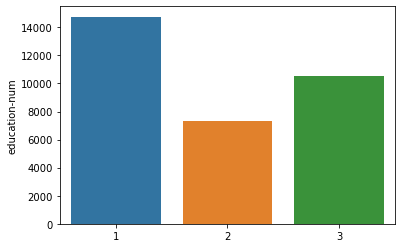

In [26]:
eda['education-num'] = pd.qcut(df_original['education-num'],3,labels= ['1','2','3'])
# sns.barplot(x=[],
edun = eda['education-num'].value_counts().sort_index()
sns.barplot(x= edun.index,y=edun)

## Workclass

<AxesSubplot:xlabel='None-education', ylabel='workclass'>

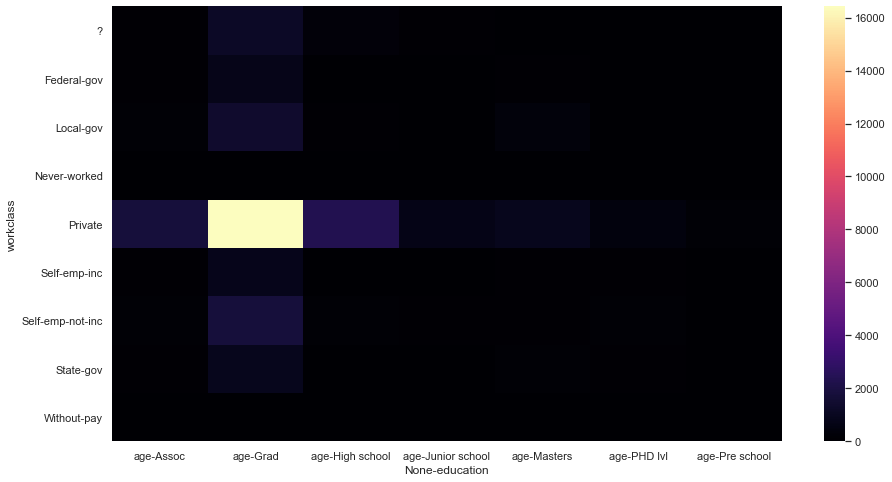

In [27]:
group8 = eda.groupby((['workclass','education']))['age'].count()
group8 = group8.to_frame()
group8 = pd.pivot_table(group8,index='workclass',columns='education')
group8.replace(np.nan,0,inplace=True)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(group8,cmap='magma')

In [28]:
eda[['workclass']]=eda[['workclass']]=='Private'
eda['workclass'].value_counts()

True     22696
False     9865
Name: workclass, dtype: int64

In [29]:

eda['workclass'] = eda['workclass'].replace([True,False],['Private','Non-Private'])
eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,Non-Private,77516,Grad,3,Never-married,Adm-clerical,Not-in-family,White,Male,40,US,<=50K
1,50,Non-Private,83311,Grad,3,Married,Exec-managerial,Husband,White,Male,13,US,<=50K
2,38,Private,215646,Grad,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,US,<=50K
3,53,Private,234721,High school,1,Married,Handlers-cleaners,Husband,Black,Male,40,US,<=50K
4,28,Private,338409,Grad,3,Married,Prof-specialty,Wife,Black,Female,40,Non-US,<=50K


## Race

<AxesSubplot:xlabel='None-race', ylabel='occupation'>

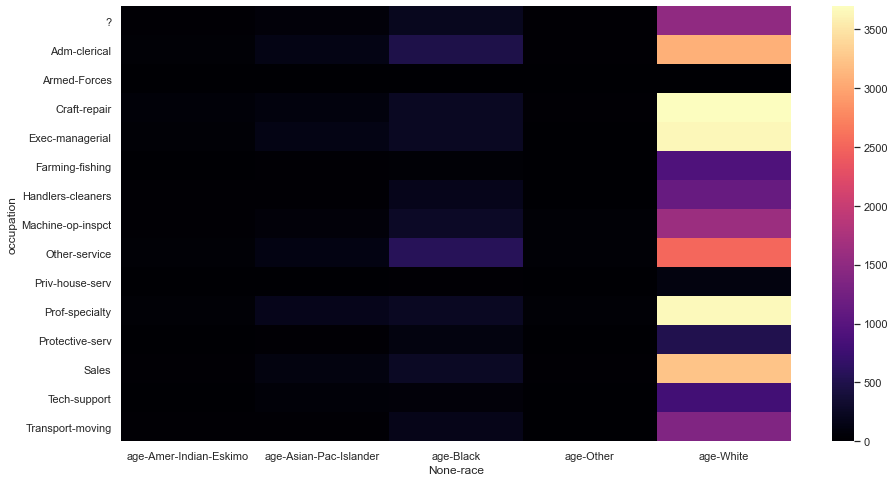

In [30]:
group9 = df_original.groupby((['occupation','race']))['age'].count()
group9 = group9.to_frame()
group9 = pd.pivot_table(group9,index='occupation',columns='race')
group9.replace(np.nan,0,inplace=True)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(group9,cmap='magma')

In [31]:
eda[['race']]=eda[['race']]=='White'

In [32]:
eda['race'] = eda['race'].replace([True,False],['White','Not-White'])
eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,Non-Private,77516,Grad,3,Never-married,Adm-clerical,Not-in-family,White,Male,40,US,<=50K
1,50,Non-Private,83311,Grad,3,Married,Exec-managerial,Husband,White,Male,13,US,<=50K
2,38,Private,215646,Grad,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,US,<=50K
3,53,Private,234721,High school,1,Married,Handlers-cleaners,Husband,Not-White,Male,40,US,<=50K
4,28,Private,338409,Grad,3,Married,Prof-specialty,Wife,Not-White,Female,40,Non-US,<=50K


In [33]:
eda['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

## Hours Per Week

<AxesSubplot:ylabel='hours-per-week'>

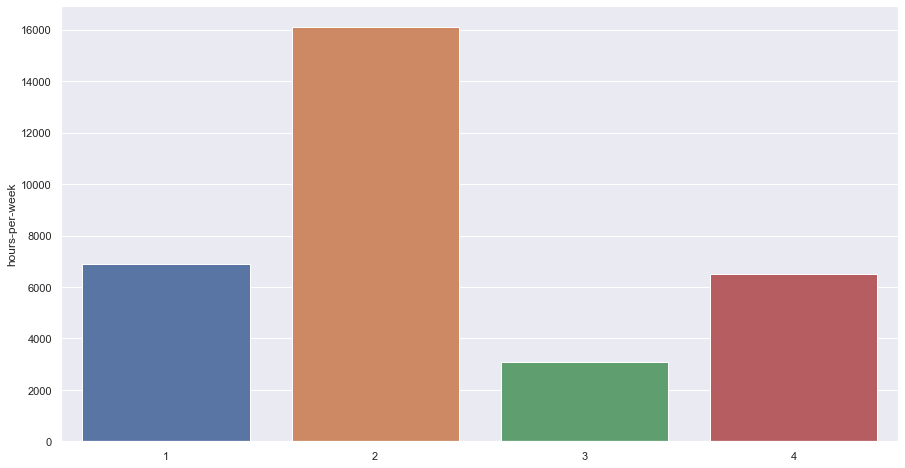

In [34]:
eda['hours-per-week'] = pd.qcut(df_original['hours-per-week'],5,labels=['1','2','3','4'],duplicates='drop',)
edh = eda['hours-per-week'].value_counts().sort_index()
sns.barplot(x= edh.index,y=edh)

# **Pivot tables**

In [35]:
eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Income
0,39,Non-Private,77516,Grad,3,Never-married,Adm-clerical,Not-in-family,White,Male,2,US,<=50K
1,50,Non-Private,83311,Grad,3,Married,Exec-managerial,Husband,White,Male,1,US,<=50K
2,38,Private,215646,Grad,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,2,US,<=50K
3,53,Private,234721,High school,1,Married,Handlers-cleaners,Husband,Not-White,Male,2,US,<=50K
4,28,Private,338409,Grad,3,Married,Prof-specialty,Wife,Not-White,Female,2,Non-US,<=50K


<AxesSubplot:xlabel='None-workclass', ylabel='Income'>

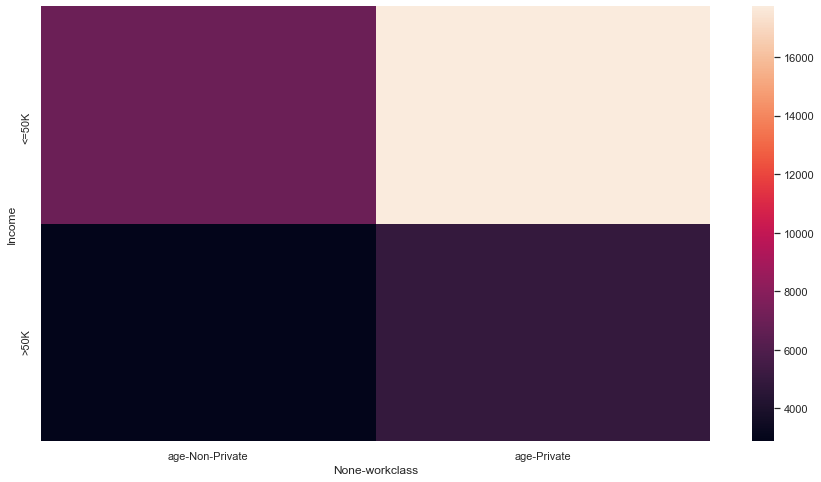

In [36]:
group1 = eda.groupby((['Income','workclass']))['age'].count()
group1 = group1.to_frame()
sns.heatmap(pd.pivot_table(group1,index='Income',columns='workclass'))


<AxesSubplot:xlabel='None-education', ylabel='Income'>

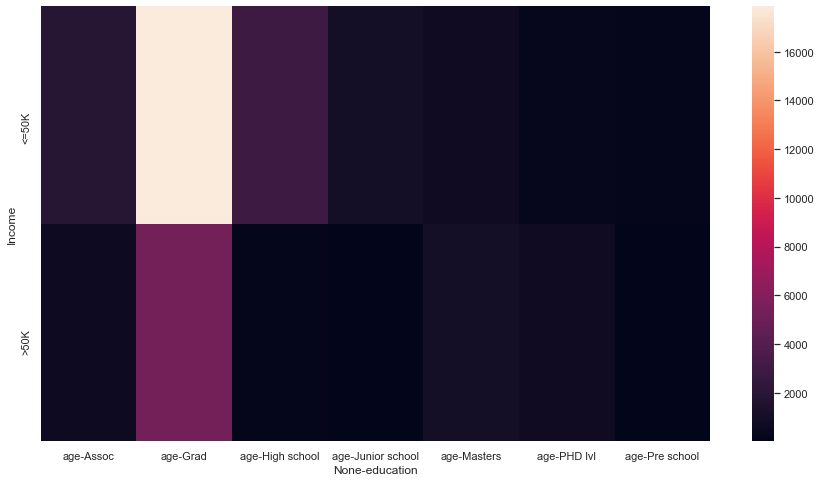

In [37]:
group2 = eda.groupby((['Income','education']))['age'].count()
group2 = group2.to_frame()
sns.heatmap(pd.pivot_table(group2,index='Income',columns='education'))


<AxesSubplot:xlabel='None-marital-status', ylabel='Income'>

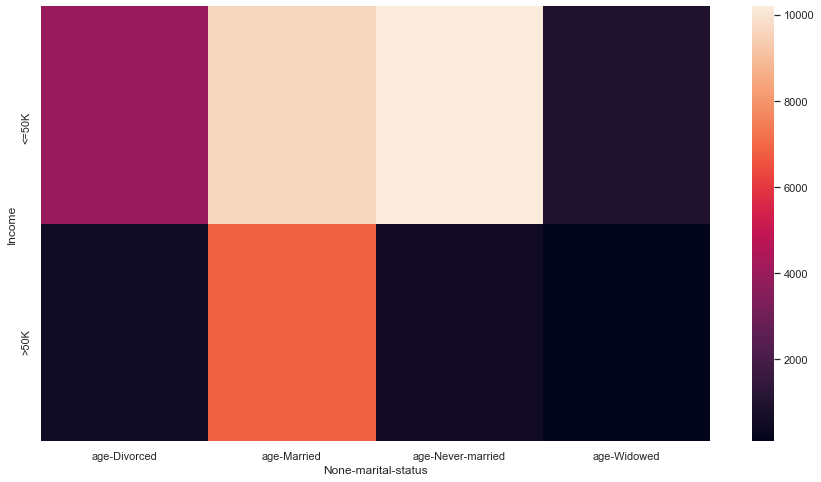

In [38]:
group4 = eda.groupby((['Income','marital-status']))['age'].count()
group4 = group4.to_frame()
sns.heatmap(pd.pivot_table(group4,index='Income',columns='marital-status'))

In [39]:
group5 = eda.groupby((['Income','occupation']))['age'].count()
group5 = group5.to_frame()
pd.pivot_table(group5,index='Income',columns='occupation')

age                                                         \
occupation     ? Adm-clerical Armed-Forces Craft-repair Exec-managerial   
Income                                                                    
<=50K       1652         3263            8         3170            2098   
>50K         191          507            1          929            1968   

                                                                              \
occupation Farming-fishing Handlers-cleaners Machine-op-inspct Other-service   
Income                                                                         
<=50K                  879              1284              1752          3158   
>50K                   115                86               250           137   

                                                                              \
occupation Priv-house-serv Prof-specialty Protective-serv Sales Tech-support   
Income                                                                         
<=50K                  148           2281             438  2667          645   
>50K                     1           1859             211   983          283   

                             
occupation Transport-moving  
Income                       
<=50K                  1277  
>50K                    320

<AxesSubplot:xlabel='None-sex', ylabel='Income'>

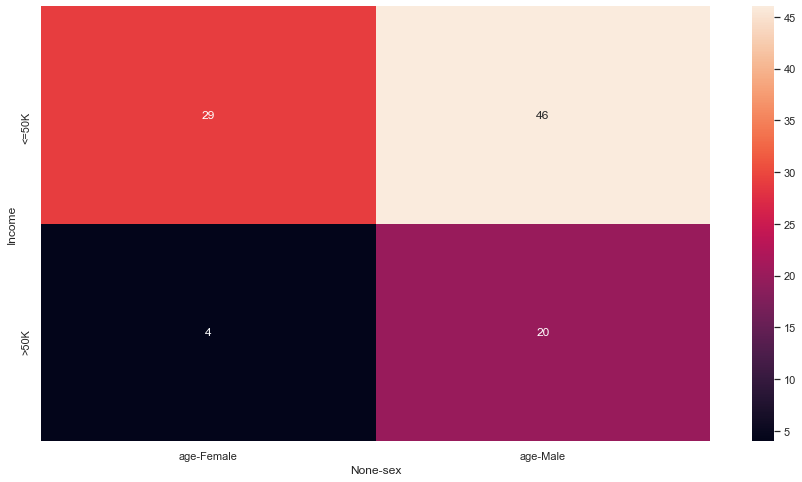

In [40]:
group6 = eda.groupby((['Income','sex']))['age'].count()
group6 = group6.to_frame()
geninc = pd.pivot_table(group6,index='Income',columns='sex')
sns.heatmap(round(geninc/32561*100),annot=True)
# sns.heatmap(pd.pivot_table(group6,index='Income',columns='sex'))

In [41]:
eda['occupation']=eda['occupation'].replace(['?','Other-service'],'Other')

<AxesSubplot:xlabel='None-education', ylabel='occupation'>

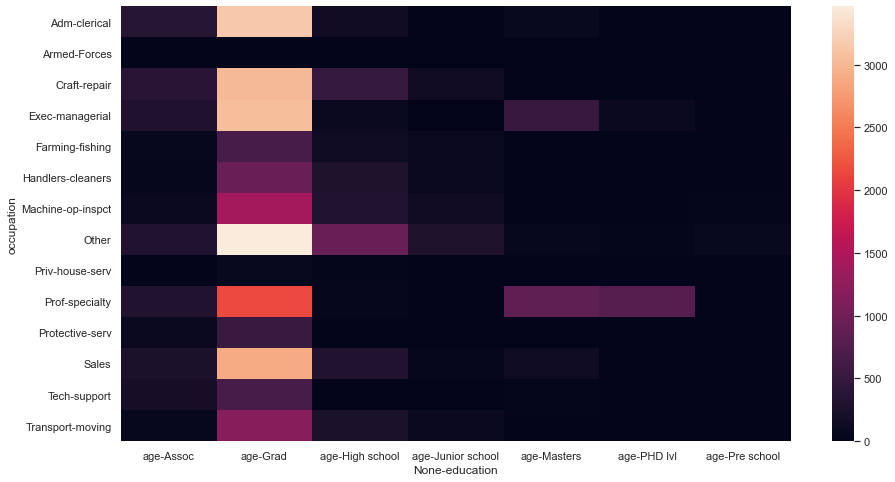

In [42]:
group7 = eda.groupby((['occupation','education']))['age'].count()
group7 = group7.to_frame()
group7 = pd.pivot_table(group7,index='occupation',columns='education')
group7.replace(np.nan,0,inplace=True)
sns.heatmap(group7)

In [43]:
df = eda[['occupation','education']].groupby(['occupation','education']).size().unstack(level=0)
df.replace(np.nan,0)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
education,,,,,,,,,,,,,,
Assoc,360.0,0.0,367.0,295.0,66.0,52.0,96.0,301.0,6.0,308.0,82.0,250.0,199.0,67.0
Grad,3152.0,7.0,3016.0,3055.0,655.0,928.0,1402.0,3465.0,73.0,2158.0,517.0,2887.0,662.0,1170.0
High school,157.0,1.0,499.0,84.0,125.0,281.0,311.0,930.0,34.0,42.0,23.0,304.0,14.0,250.0
Junior school,17.0,0.0,159.0,20.0,106.0,86.0,149.0,265.0,22.0,10.0,10.0,41.0,6.0,88.0
Masters,68.0,1.0,22.0,501.0,10.0,5.0,8.0,67.0,1.0,844.0,15.0,134.0,37.0,10.0
PHD lvl,14.0,0.0,9.0,107.0,5.0,0.0,2.0,38.0,0.0,773.0,1.0,26.0,10.0,4.0
Pre school,2.0,0.0,27.0,4.0,27.0,18.0,34.0,72.0,13.0,5.0,1.0,8.0,0.0,8.0


# **Features Extraction & Encoding**

In [44]:
features = eda.drop('Income',axis=1)
features.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,Non-Private,77516,Grad,3,Never-married,Adm-clerical,Not-in-family,White,Male,2,US
1,50,Non-Private,83311,Grad,3,Married,Exec-managerial,Husband,White,Male,1,US
2,38,Private,215646,Grad,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,2,US
3,53,Private,234721,High school,1,Married,Handlers-cleaners,Husband,Not-White,Male,2,US
4,28,Private,338409,Grad,3,Married,Prof-specialty,Wife,Not-White,Female,2,Non-US


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])


In [46]:
from sklearn.compose import ColumnTransformer

cat_attribs = list(features.drop(['age','fnlwgt','education-num','hours-per-week'],axis=1))
num_attribs = ['age','fnlwgt']

# full_pipeline = ColumnTransformer([
# ("num", num_pipeline, num_attribs),
# ("cat", OneHotEncoder(drop_first=True), cat_attribs),
# ])

# feature-prep = full_pipeline.fit_transform(features.drop(['education-num','hours-per-week'],axis=1))
# feature-prep

In [47]:
cat = OneHotEncoder(drop='first',sparse=False)
cat_featu = cat.fit_transform(features.drop(['age','fnlwgt','education-num','hours-per-week'],axis=1))

In [48]:
num_featu = StandardScaler().fit_transform(features[['age','fnlwgt']])


In [49]:
extra = features[['education-num','hours-per-week']].values

In [50]:
X_featu = np.concatenate((num_featu,extra,cat_featu),axis=1)
y = target_binary.values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_featu, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((26048, 35), (6513, 35))

# **Model Selection**

In [52]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


### Random Forest Classifier

In [53]:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
training_score = cross_val_score(rdf, X_train, y_train, cv=10)

In [54]:
training_score.mean()

0.8182589313355211

0.999680969851651
0.9997354849354146


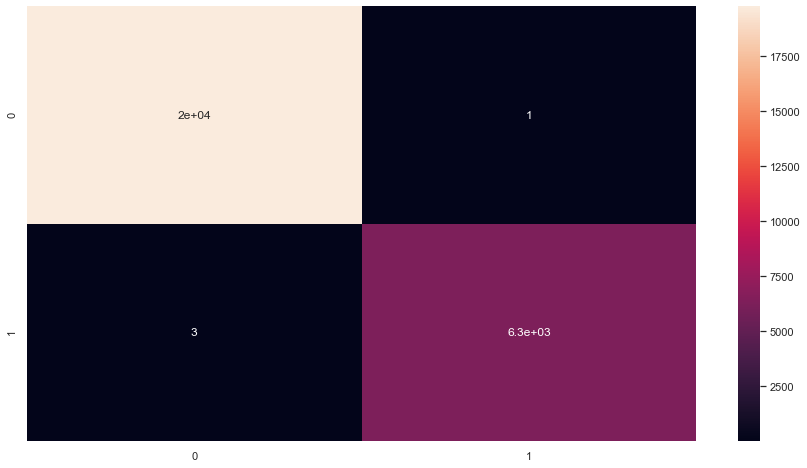

In [55]:
y_pred = rdf.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred),annot=True)
print(f1_score(y_train,y_pred))
print(roc_auc_score(y_train, y_pred))

### Logistic Regression

In [56]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
training_score = cross_val_score(lg, X_train, y_train, cv=10)

In [57]:
training_score.mean()

0.8325015257790318

0.617011899515205
0.7392898897055562


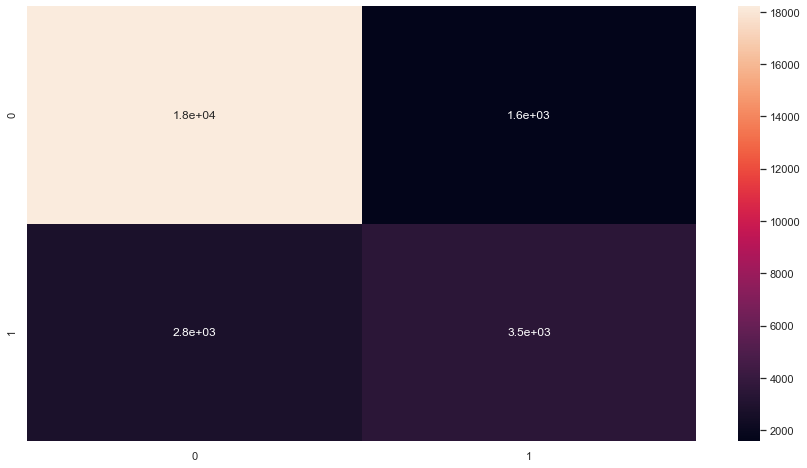

In [58]:
y_pred = lg.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred),annot=True)
print(f1_score(y_train,y_pred))
print(roc_auc_score(y_train, y_pred))

### SVC

In [59]:
svc =SVC()
svc.fit(X_train,y_train)
training_score = cross_val_score(svc, X_train, y_train, cv=10)

In [60]:
training_score.mean()

0.8335763965669235

0.60862293254042
0.7303977660806886


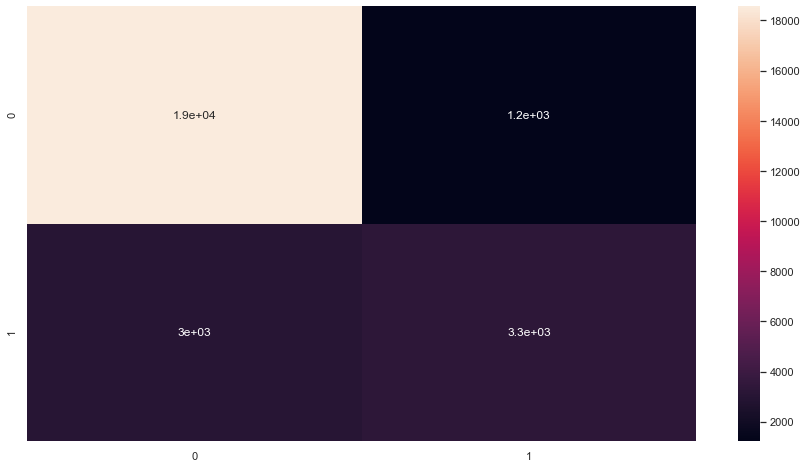

In [61]:
y_pred = svc.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred),annot=True)
print(f1_score(y_train,y_pred))
print(roc_auc_score(y_train, y_pred))

### KNN

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
training_score = cross_val_score(knn, X_train, y_train, cv=10)

In [63]:
training_score.mean()

0.8138053960981333

0.7185917130283153
0.8085000523353079


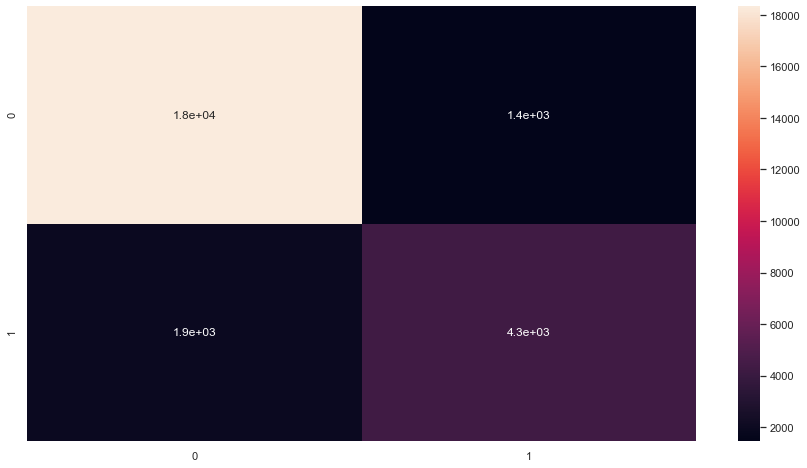

In [64]:
y_pred = knn.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred),annot=True)
print(f1_score(y_train,y_pred))
print(roc_auc_score(y_train, y_pred))

## According to f1 and roc score we'll be selecting Random Forest Classifier and KNN

## Hyperparameter Tuning of Selected Model

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

### Random Forest Classifier Tuning

In [74]:

param_distribs = { 
        'max_depth': [20,60,100],
        'max_features':[5,10],
        'min_samples_leaf': [2,5,10],
        'min_samples_split': [5,10],
        'n_estimators': [500,1000,1500]
    }
forest_reg1 = RandomForestClassifier(n_jobs=-2)
grid_search1 = GridSearchCV(forest_reg1, param_grid=param_distribs, cv=3, scoring='neg_mean_squared_error')
grid_search1.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-2),
             param_grid={'max_depth': [20, 60, 100], 'max_features': [5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [500, 1000, 1500]},
             scoring='neg_mean_squared_error')

In [75]:
grid_search1.best_params_

{'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 500}

In [76]:
grid_search1.best_estimator_

RandomForestClassifier(max_depth=100, max_features=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=500, n_jobs=-2)

### KNN

In [90]:
param_distribs1 = { 
        'n_neighbors':[3,6,12,16,20],
        'algorithm':['ball_tree','kd_tree','brute'] 
    }
knn_search = KNeighborsClassifier(n_jobs=-2)
grid_search2 = GridSearchCV(knn_search, param_grid=param_distribs1, cv=3, scoring='neg_mean_squared_error')
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-2),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 6, 12, 16, 20]},
             scoring='neg_mean_squared_error')

In [91]:
grid_search2.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 16}

In [92]:
grid_search2.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-2, n_neighbors=16)

# Accuracy of Tuned Models

In [93]:
from sklearn.metrics import accuracy_score
final_rdf = grid_search1.best_estimator_
final_knn = grid_search2.best_estimator_

### Random Forest Classifier

0.8629453316953317
0.6805654974946314
0.7753850193285823


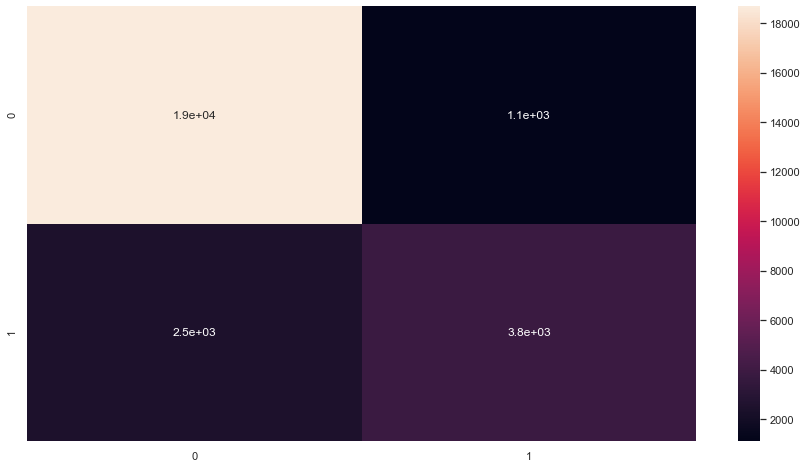

In [78]:
y_pred1 = final_rdf.predict(X_train)
print(accuracy_score(y_train,y_pred1))
sns.heatmap(confusion_matrix(y_train, y_pred1),annot=True)
print(f1_score(y_train,y_pred1))
print(roc_auc_score(y_train, y_pred1))

0.8413941348073085
0.6301467955603295
0.7454750085073422


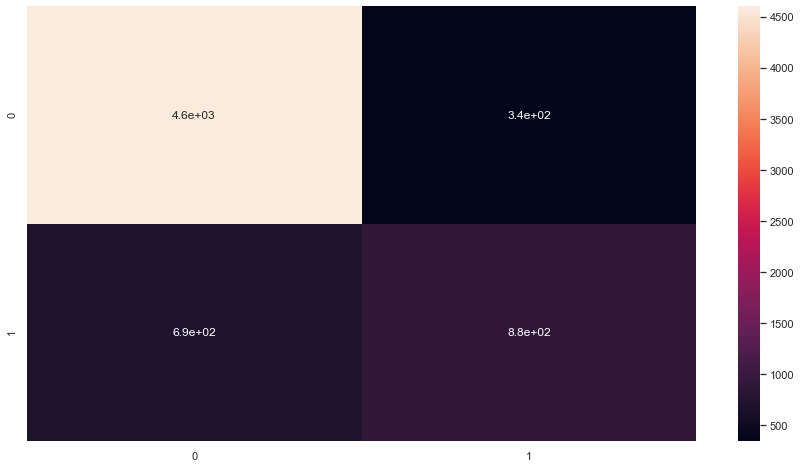

In [80]:
y_pred = final_rdf.predict(X_test)
print(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))

### KNN

0.8467444717444718
0.6537727666955767
0.7628648170127006


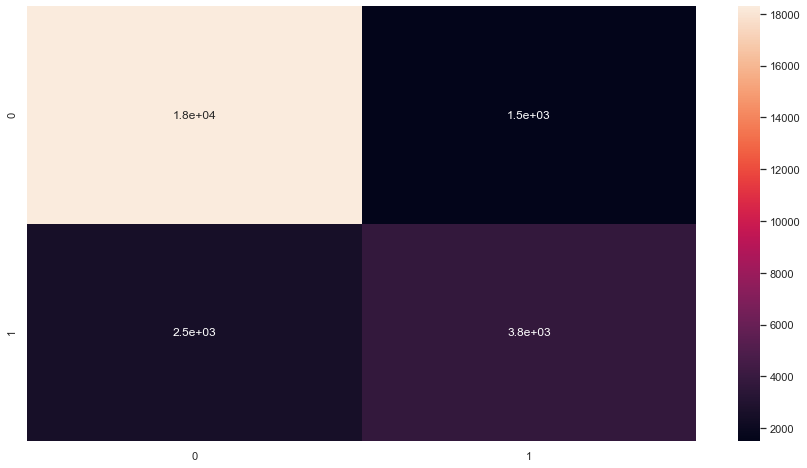

In [94]:
y_pred1 = final_knn.predict(X_train)
print(accuracy_score(y_train,y_pred1))
sns.heatmap(confusion_matrix(y_train, y_pred1),annot=True)
print(f1_score(y_train,y_pred1))
print(roc_auc_score(y_train, y_pred1))

0.8314140948871488
0.6203319502074689
0.7425893386839213


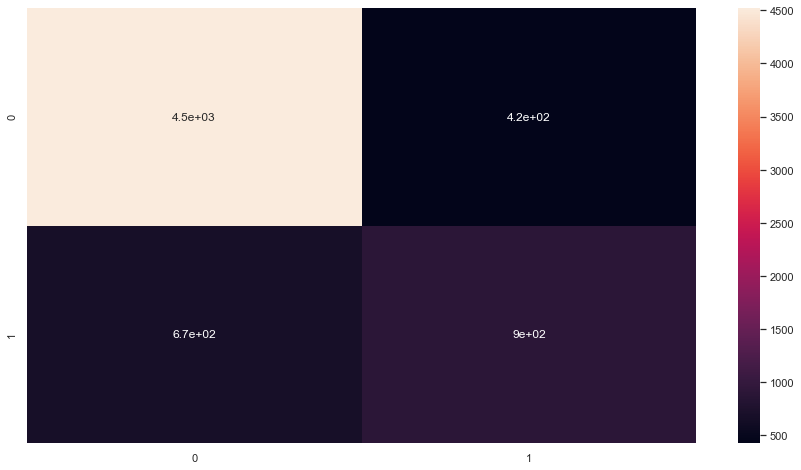

In [95]:
y_pred = final_knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))

# Random Forest Classifier is the best model with accuracy of approx 84%